<a href="https://colab.research.google.com/github/SH1V4M100/Genetic_Algo/blob/main/GeneticAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

In [ ]:
#Required Libraries
import random,statistics
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 20
locations = [(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]
depot = (50,50)
num_vehicles = 3

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop=toolbox.population(3)
pop

[[1, 4, 19, 15, 17, 7, 3, 14, 13, 6, 10, 8, 0, 16, 12, 11, 18, 9, 5, 2],
 [19, 0, 8, 12, 13, 18, 14, 5, 16, 9, 3, 1, 4, 7, 17, 2, 6, 10, 15, 11],
 [2, 11, 1, 5, 14, 9, 18, 8, 19, 6, 13, 15, 16, 12, 10, 3, 7, 0, 17, 4]]

In [ ]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)

<class 'tuple'>


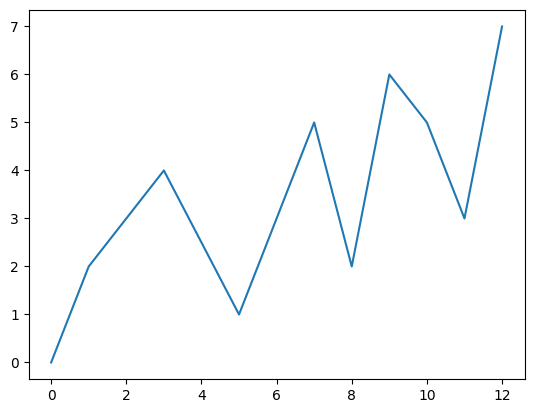

(75.26306408005117, 6.939358280255877)

In [ ]:
coordinates = [
    (0, 0),
    (1, 2),
    (3, 4),
    (5, 1),
    (6, 3),
    (7, 5),
    (8, 2),
    (9, 6),
    (10, 5),
    (11, 3),
    (12, 7)
]
x,y=zip(*coordinates)
print(type(x))
plt.plot(x,y)
plt.show()
evalVRP(pop[0])

In [ ]:
# Genetic Operators
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes,indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

#Mating Methods for sequence of indices
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxUniformPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxOrdered

#Mutation Methods for Sequences
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.mutShuffleIndexes

In [ ]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    # Plot routes as lines between locations
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[pop[0][j]] for j in range(i, len(pop[0]), num_vehicles)] + [depot]
        x, y = zip(*vehicle_route)
        plt.plot(x, y,'--',label=f'Vehicle {i+1}')
    plt.legend()
    plt.show()


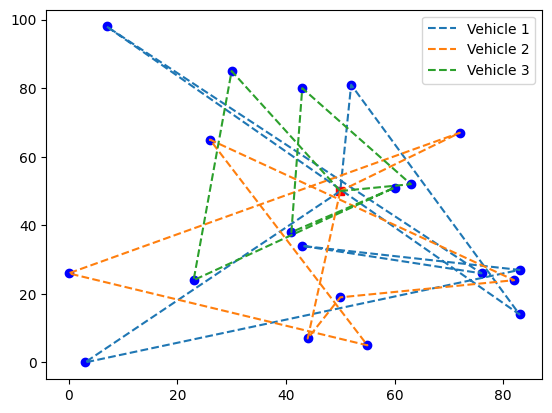

In [ ]:
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    # Plot routes as lines between locations
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[pop[0][j]] for j in range(i, len(pop[0]), num_vehicles)] + [depot]
        x, y = zip(*vehicle_route)
        plt.plot(x, y,'--',label=f'Vehicle {i+1}')
    plt.legend()
    plt.show()

gen	nevals	avg    	min    
0  	300   	563.534	3.09032
1  	213   	544.863	3.09032
2  	243   	536.606	5.22961
3  	232   	530.853	1.67249
4  	233   	525.053	0.225779
5  	218   	518.946	3.83781 
6  	213   	512.596	3.07376 
7  	233   	515.048	6.36501 
8  	219   	503.083	3.34315 
9  	209   	497.109	4.52815 
10 	224   	494.61 	5.04433 
11 	230   	503.858	6.67323 
12 	230   	502.735	1.4858  
13 	217   	493.779	8.23853 
14 	231   	495.646	4.09109 
15 	250   	500.647	2.50657 
16 	238   	501.428	6.22478 
17 	236   	496.837	4.40751 
18 	225   	495.958	4.40751 
19 	225   	484.508	0.832926
20 	209   	478.454	2.39599 
21 	232   	478.839	3.04551 
22 	237   	474.651	2.89122 
23 	217   	465.167	2.29626 
24 	227   	453.063	4.66603 
25 	246   	457.062	1.97715 
26 	233   	438.316	1.97715 
27 	219   	427.078	1.42497 
28 	229   	416.96 	4.324   
29 	223   	413.842	4.34492 
30 	238   	415.198	4.66832 


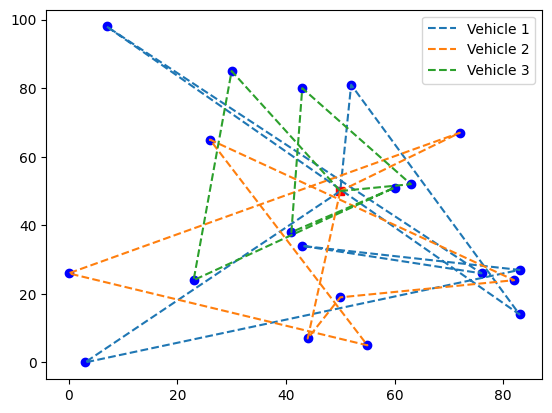

In [ ]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop,logbook=algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    plot_routes(hof)

    #return pop, stats, hof

if __name__ == "__main__":
    main()